In [18]:
# Import Libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from scipy.stats import pearsonr
import numpy.polynomial.polynomial as poly

from matplotlib.lines import Line2D
from matplotlib.ticker import MaxNLocator
from sklearn import neighbors

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../Proyecto_3'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

../Proyecto_3/Proyecto 3_problema 2.ipynb
../Proyecto_3/.DS_Store
../Proyecto_3/Proyecto 3_problema_1.ipynb
../Proyecto_3/input/problem1.csv
../Proyecto_3/input/problem2.csv
../Proyecto_3/.ipynb_checkpoints/Proyecto 3_problema_1-checkpoint.ipynb
../Proyecto_3/.ipynb_checkpoints/Proyecto 3_problema 2-checkpoint.ipynb


In [2]:
df_aux = pd.read_csv("../Proyecto_3/input/problem2.csv")

In [3]:
np.array(df_aux.T)[0,:]

array(['x_cholesterol', 'x_sugar', 'x_Tcell', 'y'], dtype=object)

In [49]:
df = pd.DataFrame(np.array(df_aux.T)[1:,:].astype(float),
                 columns=np.array(df_aux.T)[0,:])
df.shape

(12, 4)

In [50]:
df

,x_cholesterol,x_sugar,x_Tcell,y
0,220.0,80.0,550.0,0.0
1,240.0,120.0,600.0,0.0
2,260.0,55.0,580.0,0.0
3,220.0,75.0,575.0,0.0
4,180.0,100.0,620.0,0.0
5,280.0,74.0,674.0,0.0
6,235.0,175.0,275.0,1.0
7,200.0,180.0,180.0,1.0
8,150.0,240.0,140.0,1.0
9,280.0,130.0,80.0,1.0


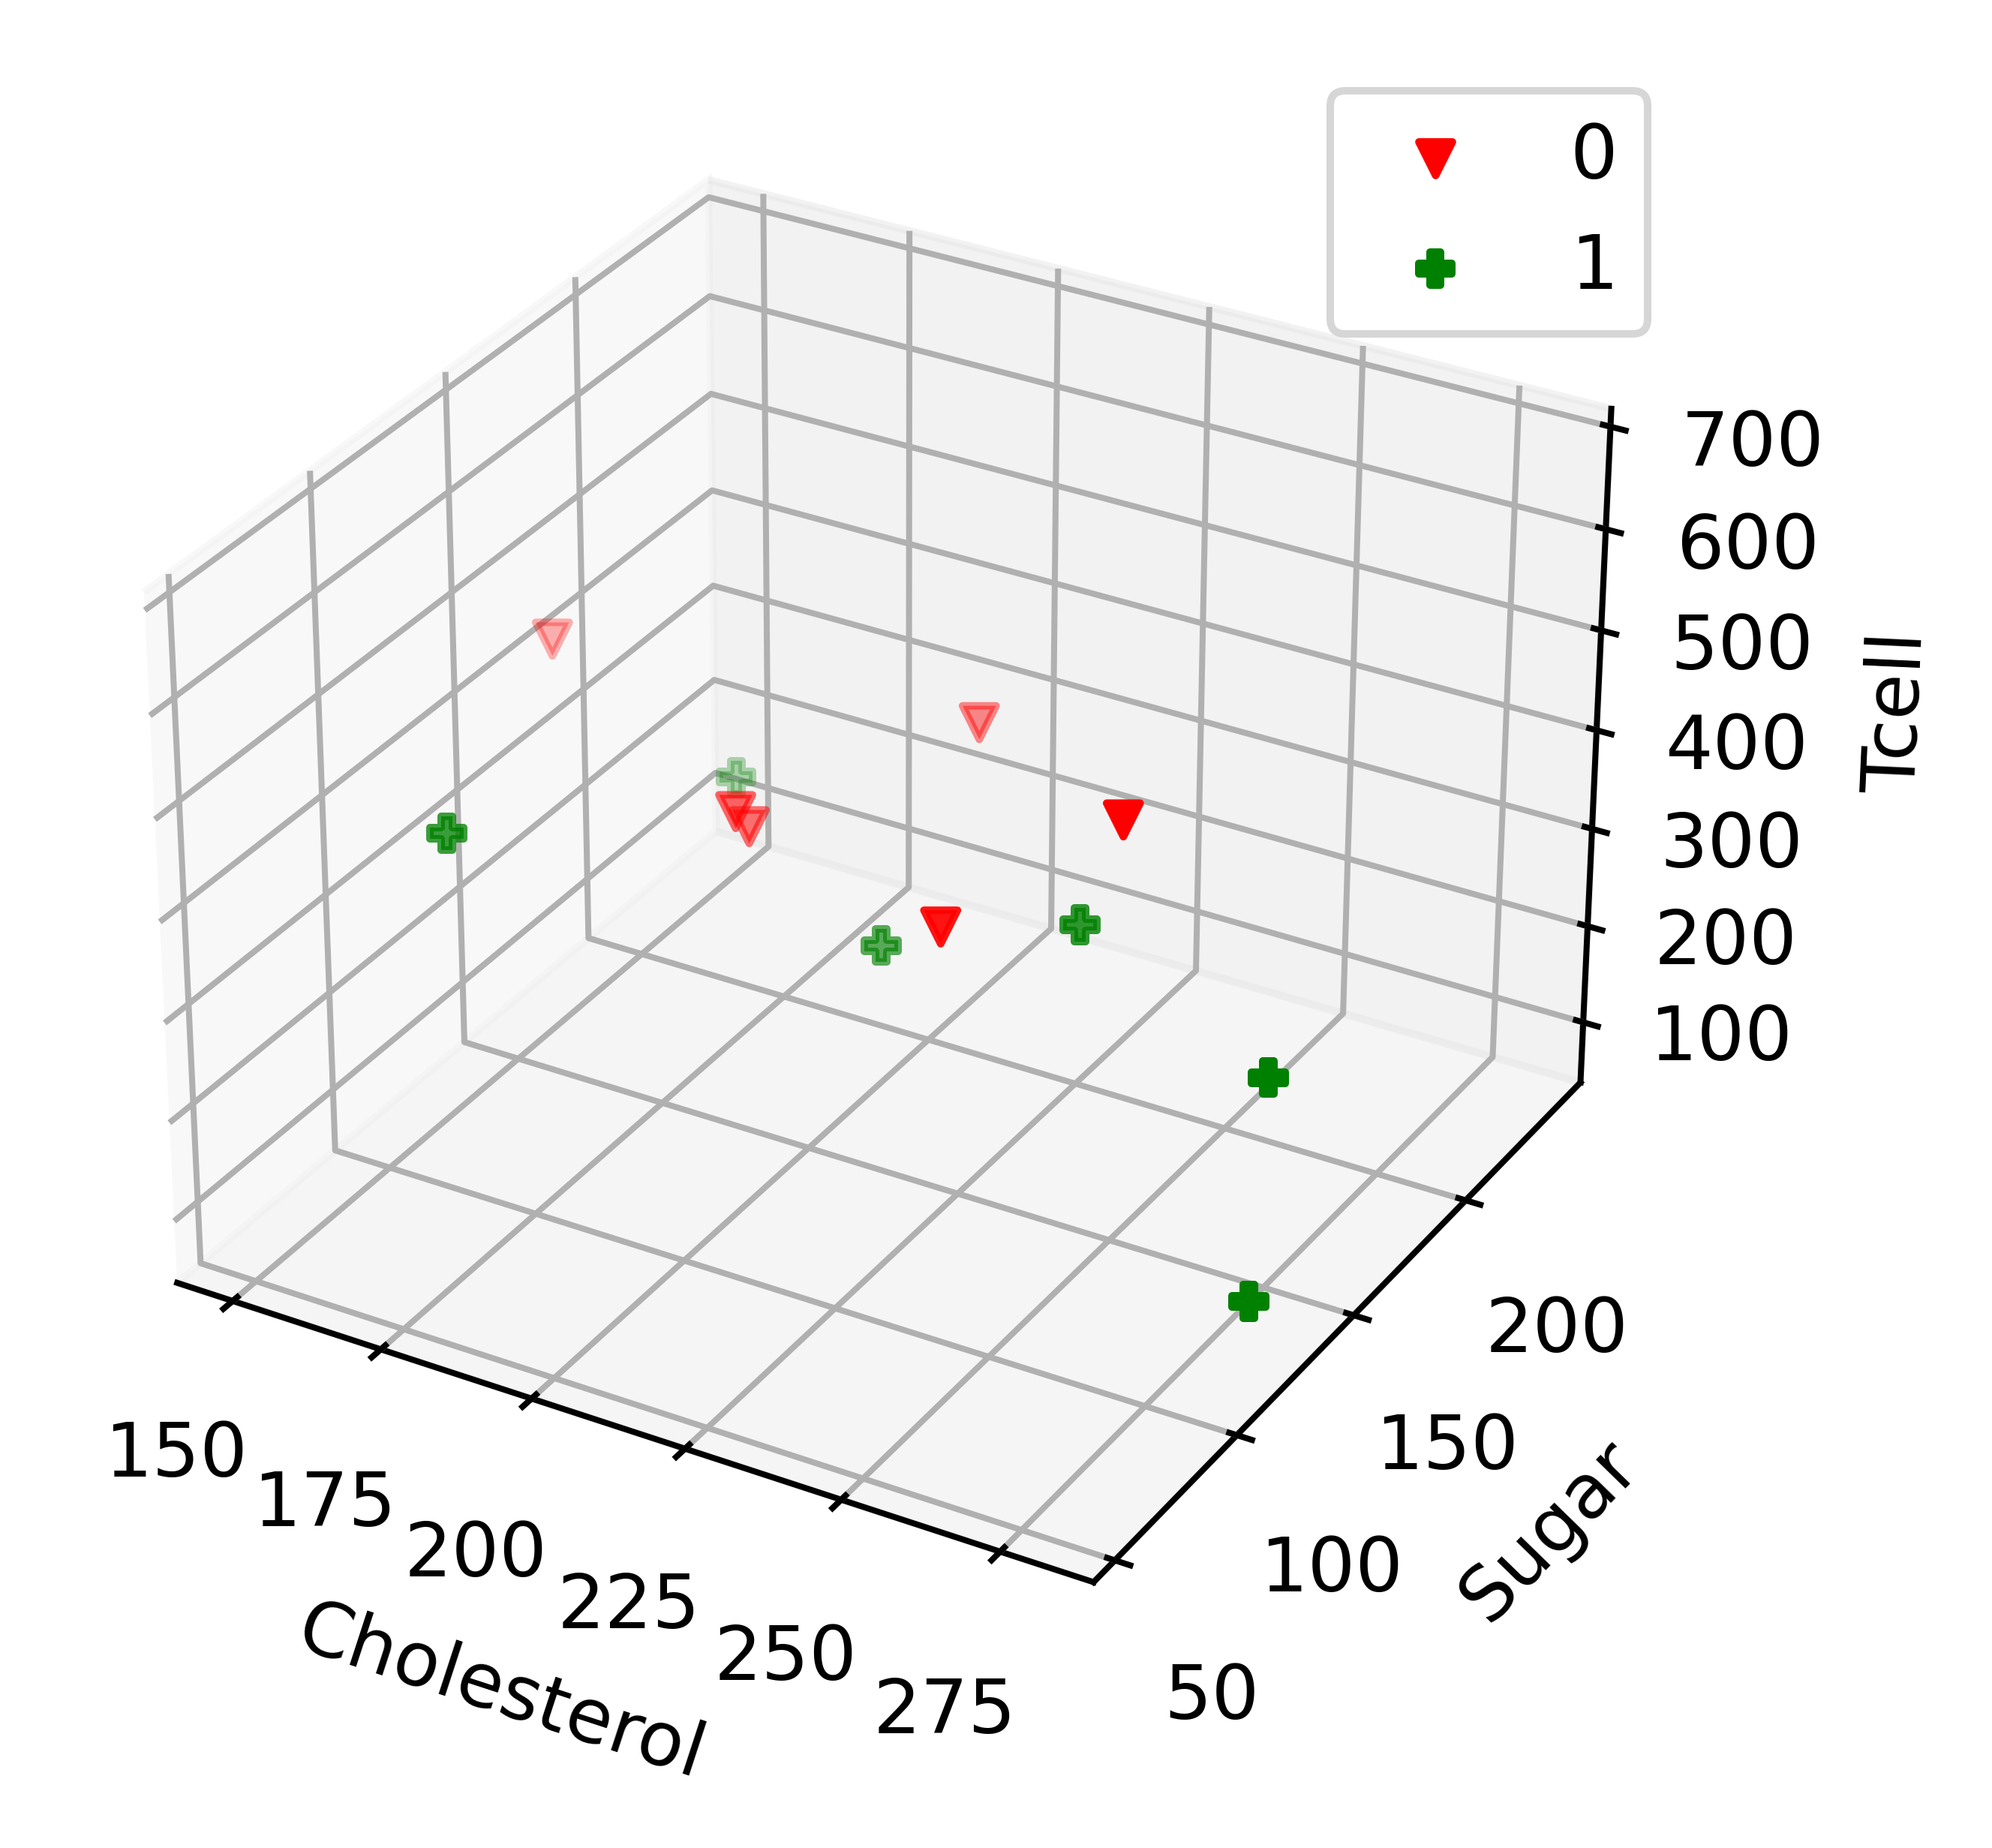

In [6]:
fig = plt.figure(dpi=720)
ax = fig.add_subplot(111, projection = '3d')

for i in [0,1]:
    x = df[df['y']==i]['x_cholesterol']
    y = df[df['y']==i]['x_sugar']
    z = df[df['y']==i]['x_Tcell']

    ax.set_xlabel("Cholesterol")
    ax.set_ylabel("Sugar")
    ax.set_zlabel("Tcell")
    if(i==1):
        ax.scatter(x, y, z, marker="P",color='green',label='1')
    elif(i==0):
        ax.scatter(x, y, z, marker="v",color='red',label='0')  

plt.legend()
plt.show()

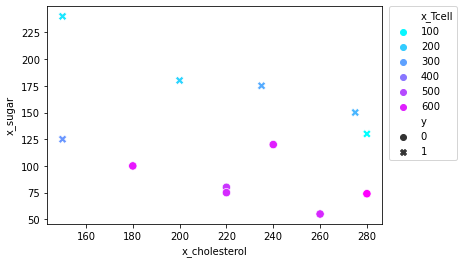

In [17]:
sns.scatterplot(data = df, x = "x_cholesterol", y = "x_sugar", style = "y", hue = "x_Tcell", palette="cool", s=70)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

From: [Stackabuse](https://stackabuse.com/seaborn-scatter-plot-tutorial-and-examples)

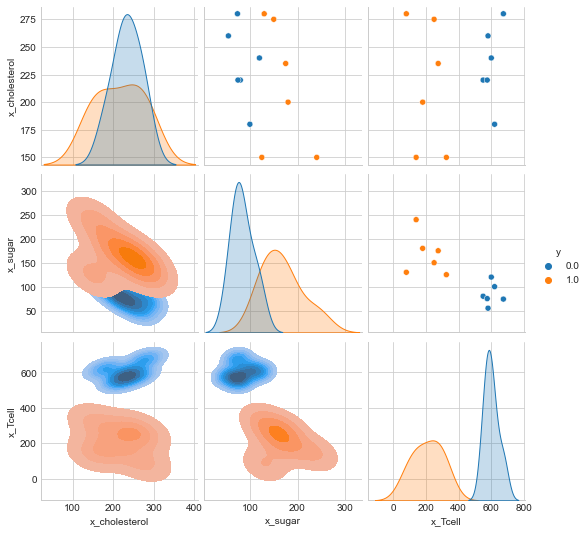

In [56]:
g = sns.pairplot(df,hue='y', markers='o')
g.map_lower(sns.kdeplot, color=".2", fill=True)
plt.show()

### Agregando un discriminante lineal

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [81]:
#model = LinearDiscriminantAnalysis()
model = QuadraticDiscriminantAnalysis()
model.fit(df[['x_cholesterol','x_sugar','x_Tcell']], df[['y']])
print('Accuracy of classifier on training set: {:.2f}' .format(model.score(df[['x_cholesterol','x_sugar','x_Tcell']], df[['y']])))


Accuracy of classifier on training set: 1.00


/Users/muon02/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [82]:
X1, Y1 = (df[['x_sugar','x_Tcell']], df[['y']])
model = LinearDiscriminantAnalysis()
#model = QuadraticDiscriminantAnalysis()
model.fit(df[['x_sugar','x_Tcell']], df[['y']])
print('Accuracy of classifier on training set: {:.2f}' .format(model.score(df[['x_sugar','x_Tcell']], df[['y']])))


Accuracy of classifier on training set: 1.00


/Users/muon02/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [83]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])
h = 5
# calculate min, max and limits
x_min, x_max = X1['x_sugar'].min() - 10, X1['x_sugar'].max() + 10
y_min, y_max = X1['x_Tcell'].min() - 10, X1['x_Tcell'].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

In [84]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

<ipython-input-85-73449af23f69>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


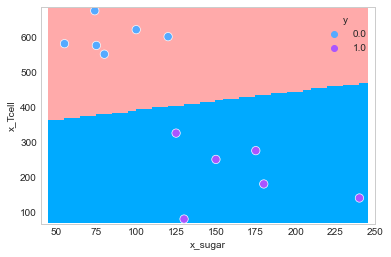

In [85]:
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
sns.scatterplot(data = df, x = "x_sugar", y = "x_Tcell", hue = "y", palette="cool", s=70)
plt.xlim(xx.min()-5, xx.max()+5)
plt.ylim(yy.min()-5, yy.max()+5)
plt.show()

## Agregando un KN

In [86]:
from sklearn import neighbors
classifier=neighbors.KNeighborsClassifier(n_neighbors=3)

In [87]:
classifier.fit(df[['x_sugar','x_Tcell']], df[['y']])

/Users/muon02/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [89]:
h = 5
# calculate min, max and limits
x_min, x_max = X1['x_sugar'].min() - 10, X1['x_sugar'].max() + 10
y_min, y_max = X1['x_Tcell'].min() - 10, X1['x_Tcell'].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

In [90]:
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

<ipython-input-92-ae154733e16d>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


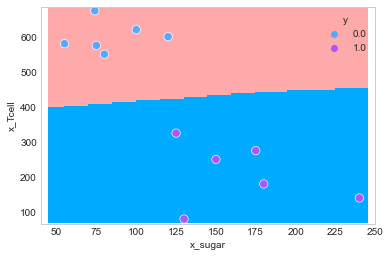

In [92]:
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
n_neighbors = 3
sns.scatterplot(data = df, x = "x_sugar", y = "x_Tcell", hue = "y", palette="cool", s=70)
plt.xlim(xx.min()-5, xx.max()+5)
plt.ylim(yy.min()-5, yy.max()+5)
plt.show()

## Agregando un logistic regresion

In [95]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
clf.fit(df[['x_sugar','x_Tcell']], df[['y']])

/Users/muon02/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=0)

In [96]:
h = 5
# calculate min, max and limits
x_min, x_max = X1['x_sugar'].min() - 10, X1['x_sugar'].max() + 10
y_min, y_max = X1['x_Tcell'].min() - 10, X1['x_Tcell'].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

In [98]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

<ipython-input-99-73449af23f69>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


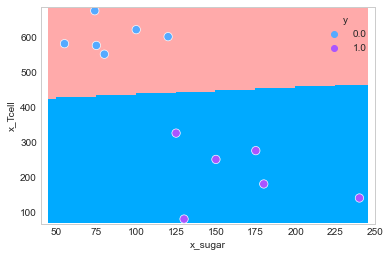

In [99]:
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
sns.scatterplot(data = df, x = "x_sugar", y = "x_Tcell", hue = "y", palette="cool", s=70)
plt.xlim(xx.min()-5, xx.max()+5)
plt.ylim(yy.min()-5, yy.max()+5)
plt.show()

In [100]:
clf.coef_

array([[ 0.01398935, -0.0705125 ]])

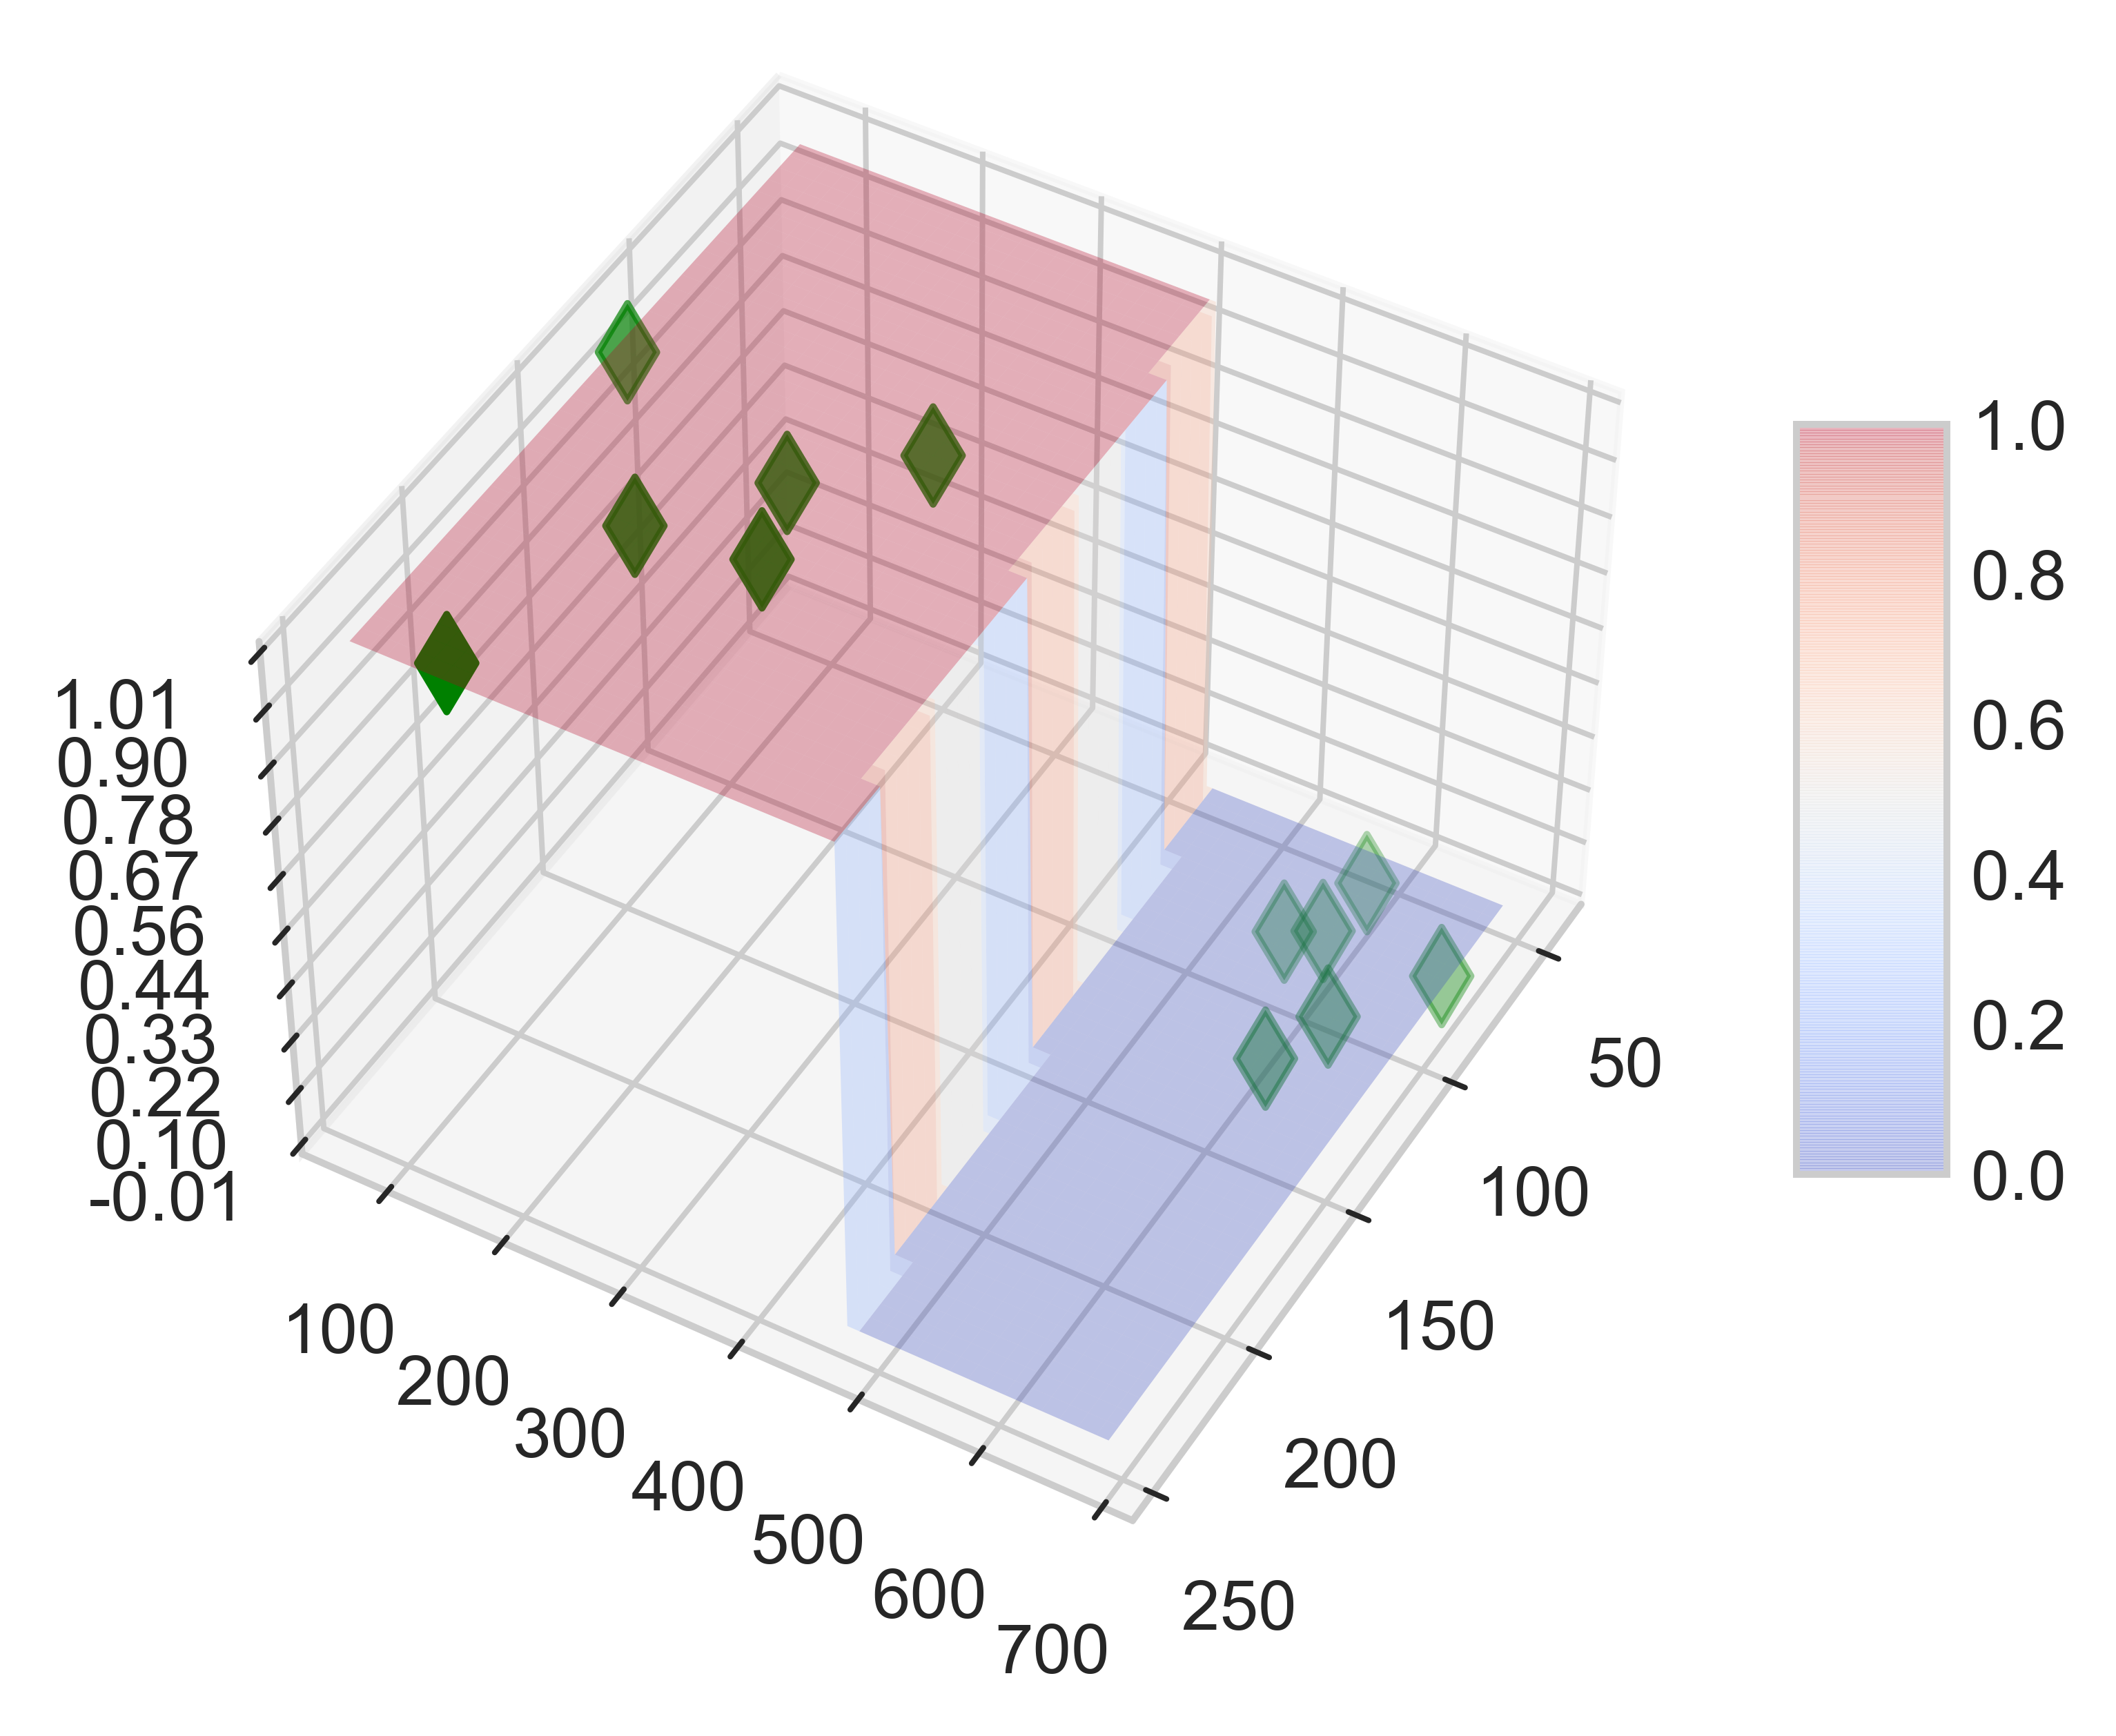

In [120]:
#Inspirado en el surface plot example de matplotlib

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig = plt.figure(dpi=720)
ax = fig.add_subplot(111, projection = '3d')


h = 5
# calculate min, max and limits
x_min, x_max = X1['x_sugar'].min() - 10, X1['x_sugar'].max() + 10
y_min, y_max = X1['x_Tcell'].min() - 10, X1['x_Tcell'].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


surf = ax.plot_surface(xx, yy, Z, cmap=cm.coolwarm,
                       linewidth=0, alpha=0.3,zorder=1)

ax.scatter(df['x_sugar'], df['x_Tcell'], df['y'], marker="d",color='green',s=100,zorder=10)


ax.view_init(elev=45., azim=30)

# Customize the z axis.
ax.set_zlim(-0.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)


plt.show()